In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("fifa21_train.csv")
pd.set_option('display.max_columns', None)
df.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


# Cleaning

In [3]:
df=df.drop(columns=['ID', 'Name', 'Nationality', 'Club', 'Team & Contract', 'Contract', 
              'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Crossing',
              'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling',
              'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 
              'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping',
              'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions',
              'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle',
              'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning','GK Reflexes',
              'Hits', 'Position', 'LS', 'RS', 'LW', 'RF', 'CF', 'LAM', 'RCM', 'LCM', 'CDM', 'LCB', 'RWB'])

In [4]:
for col in df.columns:
    df[col] = df[col].replace('★', '', regex=True)
    
for col in df.columns:
    df[col] = df[col].replace(r'\+\d', '', regex=True)
    
for col in df.columns:
    df[col] = df[col].replace(r'\+\-\d', '', regex=True)

In [5]:
for col in df.columns:
    df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].replace('\.', '', regex=True).replace('€', '', regex=True).replace('K', '000', regex=True).replace('M', '00000', regex=True)
    

In [6]:
cols = ['ST', 'LF', 'RW', 'CAM', 'RAM', 'LM', 'CM', 'RM','LWB', 'LDM', 'RDM', 'LB','CB', 'RCB', 'RB', 'GK', 'W/F', 'SM', 'IR'] 
df[cols] = df[cols].astype('int')

cols2 = ['Value', 'Wage', 'Release Clause']
df[cols2] = df[cols2].astype('float')

In [7]:
df.shape

(11701, 43)

In [8]:
round(df.isna().sum()/len(df),4)*100 

Age               0.0
BP                0.0
Growth            0.0
Value             0.0
Wage              0.0
Release Clause    0.0
Attacking         0.0
Skill             0.0
Movement          0.0
Power             0.0
Mentality         0.0
Defending         0.0
Goalkeeping       0.0
Total Stats       0.0
Base Stats        0.0
W/F               0.0
SM                0.0
A/W               0.5
D/W               0.5
IR                0.0
PAC               0.0
SHO               0.0
PAS               0.0
DRI               0.0
DEF               0.0
PHY               0.0
ST                0.0
LF                0.0
RW                0.0
CAM               0.0
RAM               0.0
LM                0.0
CM                0.0
RM                0.0
LWB               0.0
LDM               0.0
RDM               0.0
LB                0.0
CB                0.0
RCB               0.0
RB                0.0
GK                0.0
OVA               0.0
dtype: float64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum() 

Age               0
BP                0
Growth            0
Value             0
Wage              0
Release Clause    0
Attacking         0
Skill             0
Movement          0
Power             0
Mentality         0
Defending         0
Goalkeeping       0
Total Stats       0
Base Stats        0
W/F               0
SM                0
A/W               0
D/W               0
IR                0
PAC               0
SHO               0
PAS               0
DRI               0
DEF               0
PHY               0
ST                0
LF                0
RW                0
CAM               0
RAM               0
LM                0
CM                0
RM                0
LWB               0
LDM               0
RDM               0
LB                0
CB                0
RCB               0
RB                0
GK                0
OVA               0
dtype: int64

In [11]:
df.select_dtypes('object')

,BP,A/W,D/W
0,CM,High,Medium
1,ST,High,Low
2,CAM,High,Medium
3,CDM,Medium,Medium
4,CDM,Low,Medium
...,...,...,...
11695,ST,High,Low
11696,LB,Medium,Medium
11697,GK,Medium,Medium
11698,RM,High,Medium


# Exploratory Data Analysis

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='A/W', ylabel='OVA'>

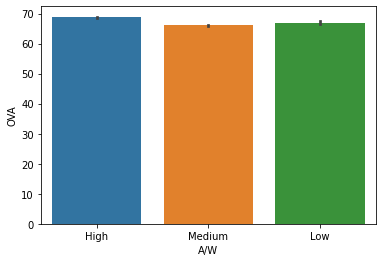

In [13]:
sns.barplot(x= 'A/W',y='OVA',data=df)


<AxesSubplot:xlabel='IR', ylabel='OVA'>

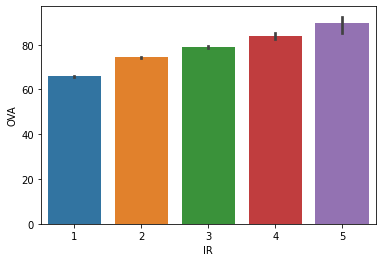

In [14]:
sns.barplot(x= 'IR',y='OVA',data=df)

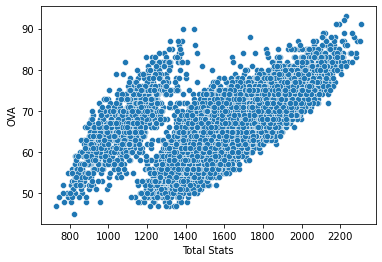

In [15]:
sns.scatterplot(x=df['Total Stats'], y=df['OVA'])
plt.show()

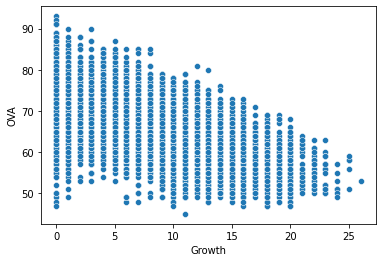

In [16]:
sns.scatterplot(x=df['Growth'], y=df['OVA'])
plt.show()

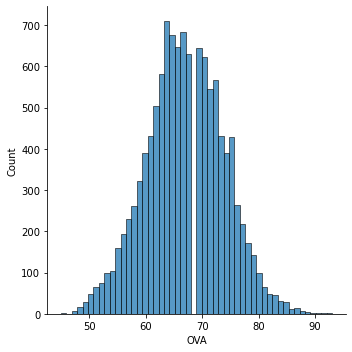

In [17]:
sns.displot(df['OVA'], bins=50)
plt.show()

<AxesSubplot:xlabel='Base Stats', ylabel='Count'>

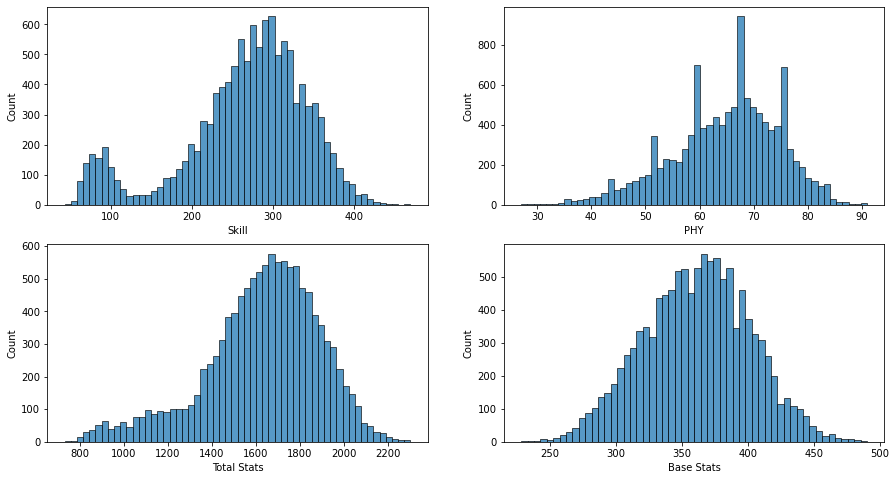

In [18]:
fig,ax = plt.subplots(2,2, figsize=(15,8))
ax=ax.flatten()
sns.histplot(df['Skill'], ax=ax[0])
sns.histplot(df['PHY'], ax=ax[1])
sns.histplot(df['Total Stats'], ax=ax[2])
sns.histplot(df['Base Stats'], ax=ax[3])

In [19]:
categorical = df.select_dtypes('object')
numerical = df._get_numeric_data()

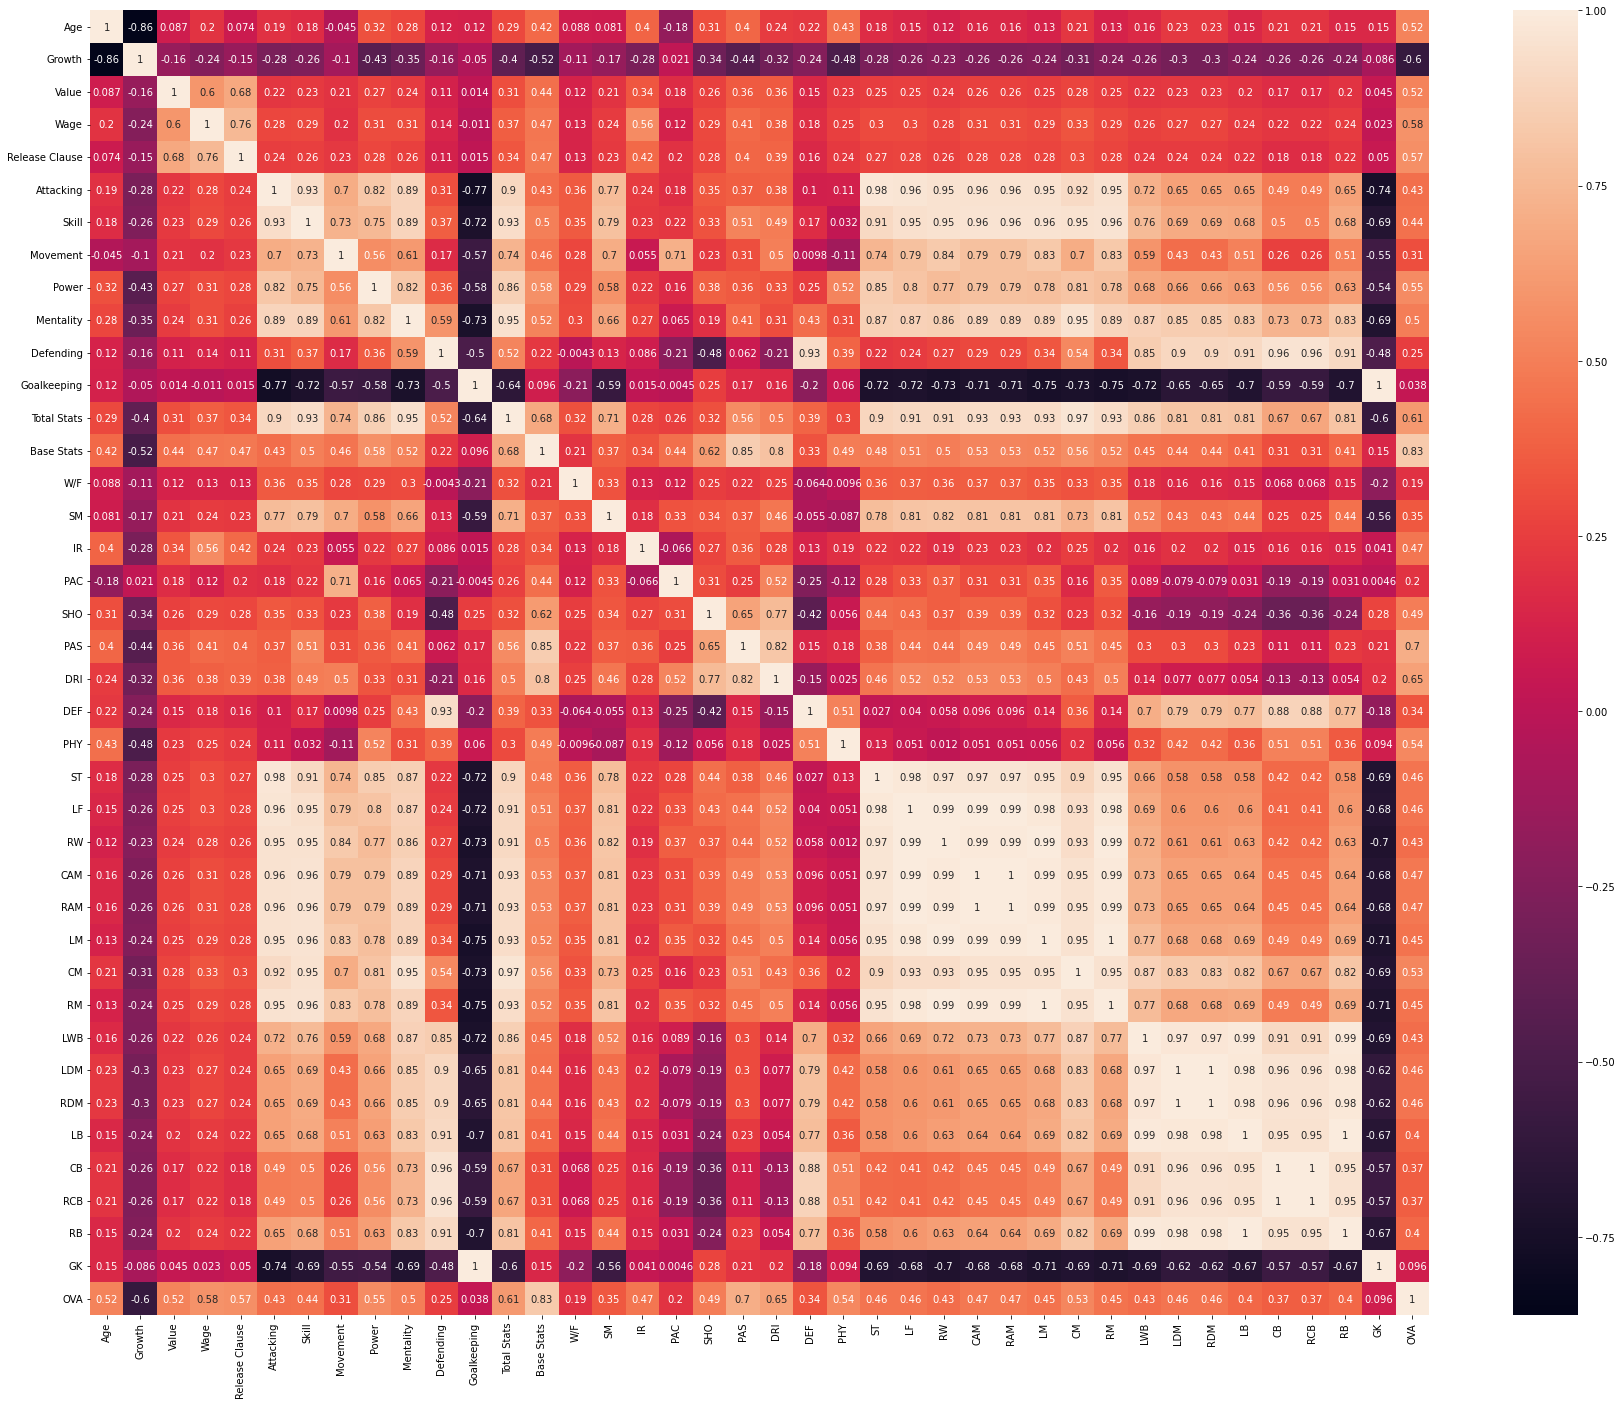

In [20]:
correlations_matrix = numerical.corr()

fig, ax=plt.subplots(figsize=(30, 24))
ax = sns.heatmap(numerical.corr(), annot=True)
plt.show()

# Processing Data

In [21]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import math
from sklearn import linear_model

In [22]:
y = numerical['OVA']
X = numerical.drop(['OVA'], axis=1)

In [23]:
# We use Min Max Scaler to normalize our numerical data (make data range from 0 - 1)

transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
print(X_normalized.shape)
norm_data = pd.DataFrame(X_normalized, columns=X.columns)
norm_data

(11642, 39)


,Age,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK
0,0.370370,0.038462,0.007241,0.007143,0.004811,0.546835,0.569087,0.663818,0.556270,0.654596,0.518219,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.565789,0.602564,0.602564,0.610390,0.610390,0.631579,0.643836,0.631579,0.642857,0.614286,0.614286,0.637681,0.527778,0.527778,0.637681,0.075949
1,0.518519,0.000000,0.117241,0.041071,0.000000,0.817722,0.777518,0.829060,0.768489,0.718663,0.230769,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.815789,0.794872,0.807692,0.779221,0.779221,0.802632,0.712329,0.802632,0.614286,0.528571,0.528571,0.565217,0.444444,0.444444,0.565217,0.113924
2,0.629630,0.000000,0.012414,0.087500,0.091892,0.744304,0.892272,0.886040,0.562701,0.771588,0.242915,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.763158,0.820513,0.846154,0.831169,0.831169,0.842105,0.794521,0.842105,0.642857,0.571429,0.571429,0.565217,0.347222,0.347222,0.565217,0.037975
3,0.222222,0.500000,0.003793,0.007143,0.004168,0.506329,0.505855,0.481481,0.463023,0.562674,0.599190,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.460526,0.461538,0.474359,0.480519,0.480519,0.500000,0.547945,0.500000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.623188,0.063291
4,0.259259,0.307692,0.010000,0.003571,0.008408,0.524051,0.555035,0.601140,0.472669,0.665738,0.668016,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.539474,0.564103,0.576923,0.584416,0.584416,0.618421,0.643836,0.618421,0.714286,0.685714,0.685714,0.710145,0.625000,0.625000,0.710145,0.075949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,0.481481,0.000000,0.007586,0.000893,0.007207,0.627848,0.562061,0.726496,0.546624,0.554318,0.242915,0.112412,0.576605,0.416031,0.50,0.50,0.00,0.571429,0.671053,0.323529,0.567164,0.272727,0.468750,0.657895,0.615385,0.602564,0.571429,0.571429,0.565789,0.506849,0.565789,0.457143,0.414286,0.414286,0.434783,0.375000,0.375000,0.434783,0.126582
11638,0.333333,0.192308,0.008621,0.005357,0.005351,0.460759,0.480094,0.626781,0.450161,0.587744,0.663968,0.114754,0.545455,0.454198,0.50,0.25,0.00,0.700000,0.144737,0.455882,0.462687,0.623377,0.656250,0.434211,0.474359,0.525641,0.493506,0.493506,0.565789,0.547945,0.565789,0.700000,0.628571,0.628571,0.710145,0.625000,0.625000,0.710145,0.088608
11639,0.407407,0.153846,0.022069,0.007143,0.017417,0.106329,0.124122,0.353276,0.270096,0.128134,0.085020,0.784543,0.249205,0.606870,0.25,0.00,0.00,0.657143,0.657895,0.602941,0.656716,0.363636,0.671875,0.171053,0.141026,0.128205,0.103896,0.103896,0.131579,0.123288,0.131579,0.157143,0.142857,0.142857,0.144928,0.138889,0.138889,0.144928,0.759494
11640,0.222222,0.307692,0.015172,0.003571,0.010210,0.617722,0.580796,0.783476,0.466238,0.518106,0.170040,0.105386,0.554355,0.416031,0.50,0.50,0.00,0.714286,0.565789,0.514706,0.656716,0.181818,0.250000,0.618421,0.641026,0.679487,0.636364,0.636364,0.671053,0.575342,0.671053,0.500000,0.400000,0.400000,0.449275,0.263889,0.263889,0.449275,0.101266


In [24]:
# Next we use one hot encoding to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categorical)
cols = encoder.get_feature_names(input_features=categorical.columns)
encoded = pd.DataFrame(encoder.transform(categorical).toarray(),columns=cols)
encoded.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
# Next we concat the two DataFrames
# We do this by merging the normalized numerical data with the encoded categories

X = pd.concat([norm_data, encoded], axis=1)  
X.head()

,Age,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.370370,0.038462,0.007241,0.007143,0.004811,0.546835,0.569087,0.663818,0.556270,0.654596,0.518219,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.565789,0.602564,0.602564,0.610390,0.610390,0.631579,0.643836,0.631579,0.642857,0.614286,0.614286,0.637681,0.527778,0.527778,0.637681,0.075949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.518519,0.000000,0.117241,0.041071,0.000000,0.817722,0.777518,0.829060,0.768489,0.718663,0.230769,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.815789,0.794872,0.807692,0.779221,0.779221,0.802632,0.712329,0.802632,0.614286,0.528571,0.528571,0.565217,0.444444,0.444444,0.565217,0.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.629630,0.000000,0.012414,0.087500,0.091892,0.744304,0.892272,0.886040,0.562701,0.771588,0.242915,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.763158,0.820513,0.846154,0.831169,0.831169,0.842105,0.794521,0.842105,0.642857,0.571429,0.571429,0.565217,0.347222,0.347222,0.565217,0.037975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.222222,0.500000,0.003793,0.007143,0.004168,0.506329,0.505855,0.481481,0.463023,0.562674,0.599190,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.460526,0.461538,0.474359,0.480519,0.480519,0.500000,0.547945,0.500000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.623188,0.063291,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.259259,0.307692,0.010000,0.003571,0.008408,0.524051,0.555035,0.601140,0.472669,0.665738,0.668016,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.539474,0.564103,0.576923,0.584416,0.584416,0.618421,0.643836,0.618421,0.714286,0.685714,0.685714,0.710145,0.625000,0.625000,0.710145,0.075949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
# Lets take a look at the target variable

y = numerical['OVA']
y.head()

0    64
1    77
2    80
3    59
4    65
Name: OVA, dtype: int64

# Modeling

In [27]:
# First we start with the train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# show training and testing shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9313, 57)
(2329, 57)
(9313,)
(2329,)


In [29]:
lm = linear_model.LinearRegression() # model
lm.fit(X_train,y_train) # model training
predictions = lm.predict(X_train)
predictions_test = lm.predict(X_test)

In [30]:
from sklearn.metrics import r2_score

r2_score(y_train, predictions)

0.9014132742999316

In [31]:
r2_score(y_test, predictions_test)

0.888753436617115

In [32]:
# The actual target amounts are displayed

y_test[:6]

906      71
6766     65
11296    70
159      74
4943     59
4461     53
Name: OVA, dtype: int64

In [33]:
# The target predictions are displayed 

predictions_test[:6]

array([69.62261371, 63.92171759, 71.16266815, 74.01884864, 58.76049081,
       54.17694181])

# Model Validation

In [34]:
# We import the necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# We calculate the mean squared error 

mse=mean_squared_error(y_test,predictions_test)
print("Mean Squared Error =", mse)

# We calculate the root of the mean squared error  

rmse = np.sqrt(mse)
print("Root of Mean Squared Error =", rmse)

# We calculate the mean absolute error 

mae = mean_absolute_error(y_test, predictions_test)
print("Mean Absolute Error =", mae)

Mean Squared Error = 5.230730803105323
Root of Mean Squared Error = 2.2870790985677174
Mean Absolute Error = 1.7136408019721467


# Test model on different dataset

In [35]:
df2 = pd.read_csv("fifa21_validate.csv")
pd.set_option('display.max_columns', None)
df2.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [36]:
df2.shape

(1999, 101)

In [37]:
def clean_data(df):
    df=df.drop(columns=['ID', 'Name', 'Nationality', 'Club', 'Team & Contract', 'Contract', 
              'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Crossing',
              'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling',
              'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 
              'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping',
              'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions',
              'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle',
              'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning','GK Reflexes',
              'Hits', 'Position', 'LS', 'RS', 'LW', 'RF', 'CF', 'LAM', 'RCM', 'LCM', 'CDM', 'LCB', 'RWB'])
    for col in df.columns:
        df[col] = df[col].replace('★', '', regex=True)
    
    for col in df.columns:
        df[col] = df[col].replace(r'\+\d', '', regex=True)
    
    for col in df.columns:
        df[col] = df[col].replace(r'\+\-\d', '', regex=True)
    
    for col in df.columns:
        df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].replace('\.', '', regex=True).replace('€', '', regex=True).replace('K', '000', regex=True).replace('M', '00000', regex=True)
    
    cols = ['ST', 'LF', 'RW', 'CAM', 'RAM', 'LM', 'CM', 'RM','LWB', 'LDM', 'RDM', 'LB','CB', 'RCB', 'RB', 'GK', 'W/F', 'SM', 'IR'] 
    df[cols] = df[cols].astype('int')

    cols2 = ['Value', 'Wage', 'Release Clause']
    df[cols2] = df[cols2].astype('float')
    
    df = df.dropna()
    
    return df


In [38]:
df2 = clean_data(df2)

In [39]:
df2.head(5)

,Age,BP,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK,OVA
0,23,CB,7,975000.0,5000.0,0.0,230,228,303,288,246,200,56,1551,334,2,2,Low,High,1,64,30,50,50,66,74,48,47,48,48,48,50,51,50,59,61,61,61,67,67,61,16,67
1,22,CAM,5,1200000.0,3000.0,2200000.0,298,330,375,323,286,61,53,1726,358,4,3,High,Low,1,74,67,62,74,24,57,64,68,68,68,68,67,61,67,49,47,47,45,38,38,45,17,68
2,19,GK,17,120000.0,500.0,249000.0,48,52,165,171,76,27,269,808,295,2,1,Medium,Medium,1,56,52,53,55,26,53,18,17,15,17,17,16,18,16,16,18,18,16,18,18,16,53,54
3,16,CDM,23,160000.0,500.0,464000.0,215,224,275,242,230,159,36,1381,303,3,2,Medium,Medium,1,58,34,47,52,53,59,46,46,47,47,47,49,49,49,53,54,54,53,54,54,53,11,55
4,24,CDM,5,2300000.0,13000.0,4300000.0,295,327,320,337,314,211,60,1864,407,4,2,Medium,Medium,1,67,62,68,70,69,71,63,66,66,68,68,67,70,67,70,72,72,69,68,68,69,18,70


### Separate numerical and categorical columns

In [40]:
cat_col = df2.select_dtypes('object')
num_col = df2.select_dtypes(np.number)

In [41]:
cat_col

,BP,A/W,D/W
0,CB,Low,High
1,CAM,High,Low
2,GK,Medium,Medium
3,CDM,Medium,Medium
4,CDM,Medium,Medium
...,...,...,...
1994,LB,High,Medium
1995,GK,Medium,Medium
1996,RM,High,Medium
1997,CDM,Medium,Medium


In [42]:
num_col

,Age,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK,OVA
0,23,7,975000.0,5000.0,0.0,230,228,303,288,246,200,56,1551,334,2,2,1,64,30,50,50,66,74,48,47,48,48,48,50,51,50,59,61,61,61,67,67,61,16,67
1,22,5,1200000.0,3000.0,2200000.0,298,330,375,323,286,61,53,1726,358,4,3,1,74,67,62,74,24,57,64,68,68,68,68,67,61,67,49,47,47,45,38,38,45,17,68
2,19,17,120000.0,500.0,249000.0,48,52,165,171,76,27,269,808,295,2,1,1,56,52,53,55,26,53,18,17,15,17,17,16,18,16,16,18,18,16,18,18,16,53,54
3,16,23,160000.0,500.0,464000.0,215,224,275,242,230,159,36,1381,303,3,2,1,58,34,47,52,53,59,46,46,47,47,47,49,49,49,53,54,54,53,54,54,53,11,55
4,24,5,2300000.0,13000.0,4300000.0,295,327,320,337,314,211,60,1864,407,4,2,1,67,62,68,70,69,71,63,66,66,68,68,67,70,67,70,72,72,69,68,68,69,18,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,21,11,325000.0,1000.0,731000.0,197,207,344,245,232,167,51,1443,315,3,2,1,76,28,46,55,53,57,44,48,51,48,48,53,48,53,58,52,52,58,54,54,58,15,60
1995,21,9,190000.0,700.0,285000.0,77,70,192,177,88,36,288,928,318,2,1,1,60,55,57,62,30,54,22,22,20,23,23,22,24,22,20,23,23,20,22,22,20,58,59
1996,27,0,800000.0,9000.0,1200000.0,332,373,351,329,306,118,58,1867,388,4,4,2,65,69,78,77,39,60,67,73,74,76,76,75,74,75,62,60,60,57,47,47,57,18,76
1997,34,0,140000.0,4000.0,245000.0,268,261,288,300,297,182,43,1639,346,3,2,1,53,47,58,58,61,69,55,55,56,57,57,57,59,57,60,62,62,60,63,63,60,14,63


#### Processing Data

In [43]:
y = num_col['OVA']
X = num_col.drop(['OVA'], axis=1)

In [44]:
#Scale the numerical data, Dont retrain MinMaxScaler

X_normalized = transformer.transform(X)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X.columns)
X_normalized.head()

(1991, 39)


,Age,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK
0,0.259259,0.269231,0.013448,0.008929,0.000000,0.475949,0.433255,0.541311,0.498392,0.532033,0.728745,0.103044,0.521297,0.404580,0.25,0.25,0.0,0.542857,0.171053,0.367647,0.328358,0.701299,0.734375,0.434211,0.410256,0.435897,0.415584,0.415584,0.460526,0.479452,0.460526,0.642857,0.642857,0.642857,0.681159,0.708333,0.708333,0.681159,0.088608
1,0.222222,0.192308,0.016552,0.005357,0.013213,0.648101,0.672131,0.746439,0.610932,0.643454,0.165992,0.096019,0.632549,0.496183,0.75,0.50,0.0,0.685714,0.657895,0.544118,0.686567,0.155844,0.468750,0.644737,0.679487,0.692308,0.675325,0.675325,0.684211,0.616438,0.684211,0.500000,0.442857,0.442857,0.449275,0.305556,0.305556,0.449275,0.101266
2,0.111111,0.653846,0.001655,0.000893,0.001495,0.015190,0.021077,0.148148,0.122186,0.058496,0.028340,0.601874,0.048951,0.255725,0.25,0.00,0.0,0.428571,0.460526,0.411765,0.402985,0.181818,0.406250,0.039474,0.025641,0.012821,0.012987,0.012987,0.013158,0.027397,0.013158,0.028571,0.028571,0.028571,0.028986,0.027778,0.027778,0.028986,0.556962
3,0.000000,0.884615,0.002207,0.000893,0.002787,0.437975,0.423888,0.461538,0.350482,0.487465,0.562753,0.056206,0.413223,0.286260,0.50,0.25,0.0,0.457143,0.223684,0.323529,0.358209,0.532468,0.500000,0.407895,0.397436,0.423077,0.402597,0.402597,0.447368,0.452055,0.447368,0.557143,0.542857,0.542857,0.565217,0.527778,0.527778,0.565217,0.025316
4,0.296296,0.192308,0.031724,0.023214,0.025826,0.640506,0.665105,0.589744,0.655949,0.721448,0.773279,0.112412,0.720280,0.683206,0.75,0.25,0.0,0.585714,0.592105,0.632353,0.626866,0.740260,0.687500,0.631579,0.653846,0.666667,0.675325,0.675325,0.684211,0.739726,0.684211,0.800000,0.800000,0.800000,0.797101,0.722222,0.722222,0.797101,0.113924


In [46]:
#we do not want to retrain ecoders for new and unseen data

cols = encoder.get_feature_names(input_features=cat_col.columns)
encoded = pd.DataFrame(encoder.transform(cat_col).toarray(),columns=cols)
encoded.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
X = pd.concat([X_normalized, encoded], axis=1)  
X.head()

,Age,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,ST,LF,RW,CAM,RAM,LM,CM,RM,LWB,LDM,RDM,LB,CB,RCB,RB,GK,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,A/W_Low,A/W_Medium,D/W_Low,D/W_Medium
0,0.259259,0.269231,0.013448,0.008929,0.000000,0.475949,0.433255,0.541311,0.498392,0.532033,0.728745,0.103044,0.521297,0.404580,0.25,0.25,0.0,0.542857,0.171053,0.367647,0.328358,0.701299,0.734375,0.434211,0.410256,0.435897,0.415584,0.415584,0.460526,0.479452,0.460526,0.642857,0.642857,0.642857,0.681159,0.708333,0.708333,0.681159,0.088608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.222222,0.192308,0.016552,0.005357,0.013213,0.648101,0.672131,0.746439,0.610932,0.643454,0.165992,0.096019,0.632549,0.496183,0.75,0.50,0.0,0.685714,0.657895,0.544118,0.686567,0.155844,0.468750,0.644737,0.679487,0.692308,0.675325,0.675325,0.684211,0.616438,0.684211,0.500000,0.442857,0.442857,0.449275,0.305556,0.305556,0.449275,0.101266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.111111,0.653846,0.001655,0.000893,0.001495,0.015190,0.021077,0.148148,0.122186,0.058496,0.028340,0.601874,0.048951,0.255725,0.25,0.00,0.0,0.428571,0.460526,0.411765,0.402985,0.181818,0.406250,0.039474,0.025641,0.012821,0.012987,0.012987,0.013158,0.027397,0.013158,0.028571,0.028571,0.028571,0.028986,0.027778,0.027778,0.028986,0.556962,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000000,0.884615,0.002207,0.000893,0.002787,0.437975,0.423888,0.461538,0.350482,0.487465,0.562753,0.056206,0.413223,0.286260,0.50,0.25,0.0,0.457143,0.223684,0.323529,0.358209,0.532468,0.500000,0.407895,0.397436,0.423077,0.402597,0.402597,0.447368,0.452055,0.447368,0.557143,0.542857,0.542857,0.565217,0.527778,0.527778,0.565217,0.025316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.296296,0.192308,0.031724,0.023214,0.025826,0.640506,0.665105,0.589744,0.655949,0.721448,0.773279,0.112412,0.720280,0.683206,0.75,0.25,0.0,0.585714,0.592105,0.632353,0.626866,0.740260,0.687500,0.631579,0.653846,0.666667,0.675325,0.675325,0.684211,0.739726,0.684211,0.800000,0.800000,0.800000,0.797101,0.722222,0.722222,0.797101,0.113924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Modeling

In [48]:
predictions_test = lm.predict(X)

In [54]:
r2_score(y, predictions_test)
r2

0.8932950235983198

In [59]:
mae = mean_absolute_error(y, predictions_test)
mae

1.6766440669405451

In [60]:
mse = mean_squared_error(y, predictions_test)
mse

4.867244757686634

In [61]:
rmse = np.sqrt(mse)
rmse

2.206183301017083